In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.autograd import Variable

import os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from datagen import ListDataset
from network import Generator, Discriminator

In [2]:
flag = {"dataset" : "densepoint",
       "weights" : "checkpoint/checkpoint_v6/ckpt_4843.pth",
       "num_pts" : 4096,
       "GPU_machine" : '0'}

In [3]:
# GPU
os.environ["CUDA_VISIBLE_DEVICES"]=flag['GPU_machine']

In [4]:
# data_loader
transform = transforms.Compose([
        transforms.ToTensor(),
        #transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

testset = ListDataset(root='/root/DB/', dataset=flag['dataset'], mode="test", 
                       num_pts=flag['num_pts'], transform=transform, augmentation=False)
test_loader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False)

In [5]:
# network
G = Generator(flag['num_pts'])
G.cuda()

#checkpoint = torch.load(flag['weights'])
#G.load_state_dict(checkpoint['G'])

G.eval()

Generator(
  (conv1): Conv2d(3, 64, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
  (conv1_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  (conv2_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 512, kernel_size=(1, 1), stride=(1, 1))
  (conv4_bn): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 1024, kernel_size=(1, 1), stride=(1, 1))
  (conv5_bn): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (max_pool): MaxPool2d(kernel_size=(4096, 1), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv6): Conv2d(2880, 1024, kernel_size=(1, 1), stride=(1, 1))
  (conv6_bn): Batch

------------------------------------------------------------
(4096, 3)


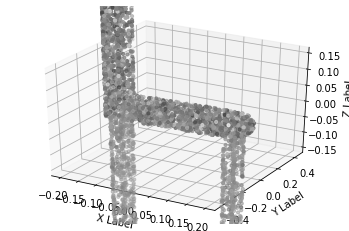

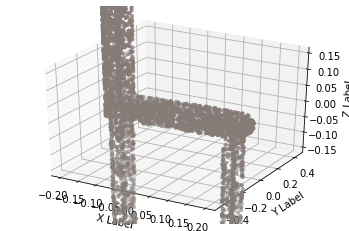

------------------------------------------------------------
(4096, 3)


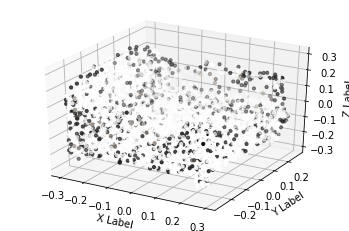

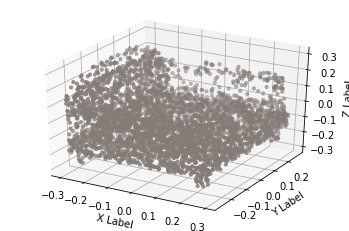

------------------------------------------------------------
(4096, 3)


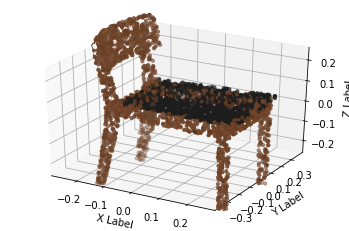

KeyboardInterrupt: 

In [6]:
for i, (x, y) in enumerate(test_loader):
    print("------------------------------------------------------------")
    x = Variable(x.cuda())
    pred = G(x)
    
    # tensor to numpy
    x = x[0].cpu().detach().numpy()
    y = y[0].cpu().detach().numpy()
    pred = pred[0].cpu().detach().numpy()
    
    x = x.transpose(1,0)
    y = y.transpose(1,0)
    pred = pred.transpose(1,0)
    
    y = (y + 1.) / 2.  # 0~1
    pred = (pred + 1.) / 2.  # 0~1
    
    # show GT
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xs = x[:, 0]
    ys = x[:, 1]
    zs = x[:, 2]
    s = 10
    c = y

    ax.scatter(xs, ys, zs, s=s, c=c, marker='o', zdir='y')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()
    
    # show Pred
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xs = x[:, 0]
    ys = x[:, 1]
    zs = x[:, 2]
    s = 10
    c = pred

    ax.scatter(xs, ys, zs, s=s, c=c, marker='o', zdir='y')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()
    
    if i == 10:
        break